# **Car Evaluation Descision Tree Algorithm**

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

1. **buying value:-** buying price

2. **Maintenance:-** price of the maintenance

3. **No of doors:-** number of doors

4. **persons:-** capacity in terms of persons to carry

5. **lug_space:-** the size of luggage boot

6. **safety:-** estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

###**Attribute Information:**

**Class Values:**

unacc, acc, good, vgood

**Attributes:**

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:




*  **buying value:**  vhigh, high, med, low.
*  **Maintainance:**  vhigh, high, med, low.
*  **No of doors:** 2, 3, 4, 5more.
*  **persons:** 2, 4, more.
*  **lug space:**  small, med, big.
*  **safety:** low, med, high.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

### **Step 1: Reading and Understanding the Data**

Let's start with the following steps:

1.Importing data using the pandas library

2.Understanding the structure of the data


In [3]:
data =pd.read_excel(r'/content/Car Evaluation.xlsx')

In [4]:
# view dimensions of dataset
data.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

**View top 5 rows of dataset**

In [5]:
# Preview of the dataset
data.head()

,buying value,Maintainance,No of doors,persons,lug space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**View summary of dataset**

In [6]:
data.info

<bound method DataFrame.info of      buying value Maintainance  No of doors  persons lug space safety  class
0           vhigh        vhigh            2        2     small    low  unacc
1           vhigh        vhigh            2        2     small    med  unacc
2           vhigh        vhigh            2        2     small   high  unacc
3           vhigh        vhigh            2        2       med    low  unacc
4           vhigh        vhigh            2        2       med    med  unacc
...           ...          ...          ...      ...       ...    ...    ...
1723          low          low            5        8       med    med   good
1724          low          low            5        8       med   high  vgood
1725          low          low            5        8       big    low  unacc
1726          low          low            5        8       big    med   good
1727          low          low            5        8       big   high  vgood

[1728 rows x 7 columns]>

In [7]:
data.describe()

,No of doors,persons
count,1728.000000,1728.000000
mean,3.500000,4.666667
std,1.118358,2.495160
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,8.000000
max,5.000000,8.000000


In [68]:
data.dtypes

buying value    object
Maintainance    object
No of doors      int64
persons          int64
lug space       object
safety          object
class           object
dtype: object

**Frequency distribution of values in variables**

Now, I will check the frequency counts of categorical variables.

In [8]:
for col in data.columns:
    print(data[col].value_counts())  

med      432
low      432
vhigh    432
high     432
Name: buying value, dtype: int64
med      432
low      432
vhigh    432
high     432
Name: Maintainance, dtype: int64
5    432
4    432
3    432
2    432
Name: No of doors, dtype: int64
8    576
4    576
2    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug space, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are not categorical in nature. So, I will  not treat them as categorical variables.

**Summary of variables**

There are 7 variables in the dataset. 

*  All the variables are not of categorical data type.
* Categorical columns are given by buying, maintenance, lug_space, safety and class.
*  class is the target variable.

### **Explore class variable**

In [9]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The class target variable is ordinal in nature.

### **Missing values in variables**

In [10]:
# check missing values in variables

data.isnull().sum()

buying value    0
Maintainance    0
No of doors     0
persons         0
lug space       0
safety          0
class           0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

### **Declare feature vector and target variable**

In [11]:
X = data.drop(['class'], axis=1)

y = data['class']

### **Split data into separate training and test set**

In [12]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

## **Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [14]:
# check data types in X_train

X_train.dtypes

buying value    object
Maintainance    object
No of doors      int64
persons          int64
lug space       object
safety          object
dtype: object

Encode categorical variables

Now, I will encode the categorical variables.

In [15]:
X_train.head()

,buying value,Maintainance,No of doors,persons,lug space,safety
48,vhigh,vhigh,3,8,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,8,small,high
1721,low,low,5,8,small,high
1208,med,low,2,8,small,high


We can see that all the variables are ordinal categorical data type.

In [16]:
# import category encoders
! pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 80 kB 3.4 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying value', 'Maintainance', 'No of doors', 'persons', 'lug space', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
X_train.head()

,buying value,Maintainance,No of doors,persons,lug space,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [19]:
X_test.head()

,buying value,Maintainance,No of doors,persons,lug space,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building.

## **Decision Tree Classifier with criterion gini index**

In [20]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [69]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the Test set results with criterion gini index

In [40]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [41]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8774


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [42]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8686


### Check for overfitting and underfitting

In [44]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8686
Test set score: 0.8774


Here, the training-set accuracy score is 0.8686 while the test-set accuracy to be 0.8774. These two values are quite comparable. So, there is no sign of overfitting.

### **Visualize decision-trees**

[Text(334.8, 398.64, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(292.95, 326.15999999999997, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(376.65000000000003, 326.15999999999997, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(334.8, 253.67999999999998, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(167.4, 181.2, 'X[1] <= 2.5\ngini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(83.7, 108.71999999999997, 'X[0] <= 1.5\ngini = 0.259\nsamples = 131\nvalue = [20, 0, 111, 0]'),
 Text(41.85, 36.23999999999995, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 70, 0]'),
 Text(125.55000000000001, 36.23999999999995, 'gini = 0.441\nsamples = 61\nvalue = [20, 0, 41, 0]'),
 Text(251.10000000000002, 108.71999999999997, 'X[5] <= 2.5\ngini = 0.382\nsamples = 140\nvalue = [104, 0, 36, 0]'),
 Text(209.25, 36.23999999999995, 'gini = 0.056\nsamples = 70\nvalue = [68, 0, 2, 0]'),
 Text(292.95

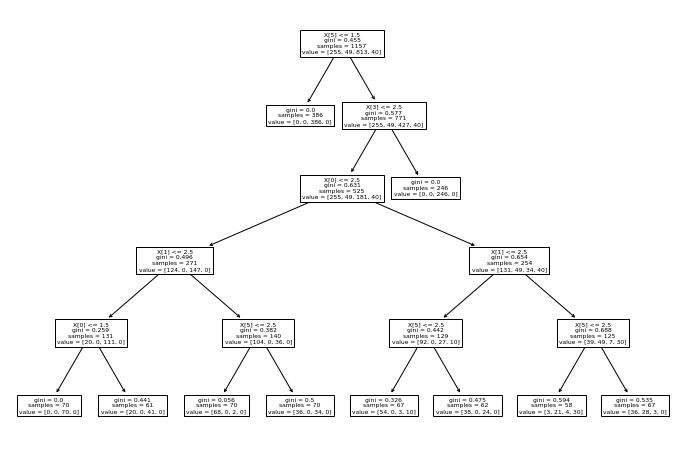

In [45]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### **Visualize decision-trees with graphviz**

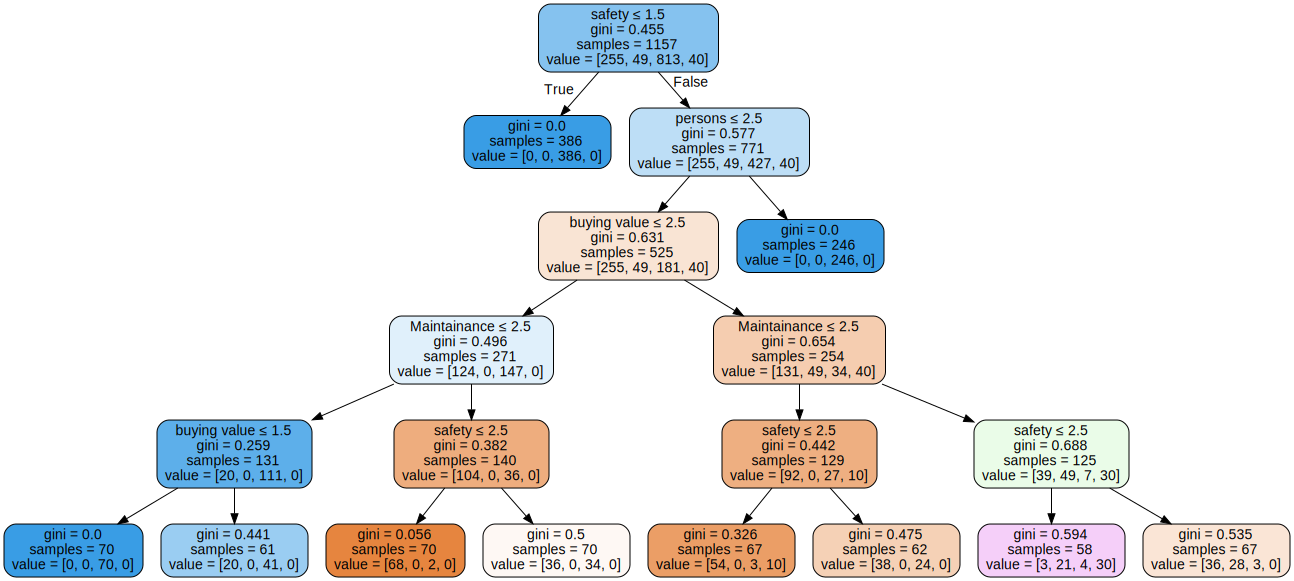

In [46]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              #class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("gini.png")
graph 

## **Decision Tree Classifier with criterion entropy**

In [48]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the Test set results with criterion entropy

In [49]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [50]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8704


### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [51]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'], dtype=object)

In [52]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8634


Check for overfitting and underfitting

In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8634
Test set score: 0.8704


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8634 while the test-set accuracy to be 0.8704. These two values are quite comparable. So, there is no sign of overfitting.

## **Visualize decision-trees**

[Text(283.2923076923077, 398.64, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(231.7846153846154, 326.15999999999997, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(334.8, 326.15999999999997, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(283.2923076923077, 253.67999999999998, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(103.01538461538462, 181.2, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(51.50769230769231, 108.71999999999997, 'entropy = 0.0\nsamples = 68\nvalue = [0, 0, 68, 0]'),
 Text(154.52307692307693, 108.71999999999997, 'X[5] <= 2.5\nentropy = 0.964\nsamples = 203\nvalue = [124, 0, 79, 0]'),
 Text(103.01538461538462, 36.23999999999995, 'entropy = 0.714\nsamples = 102\nvalue = [82, 0, 20, 0]'),
 Text(206.03076923076924, 36.23999999999995, 'entropy = 0.979\nsamples = 101\nvalue = [42, 0, 59, 0]'),
 Text(463.5692307692308, 1

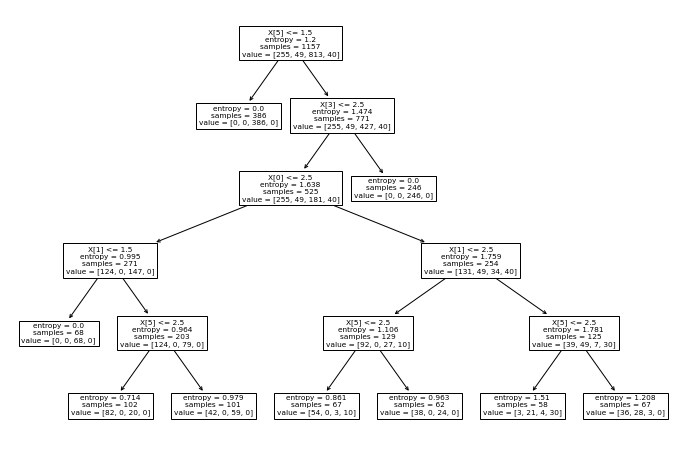

In [54]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

### **Visualize decision-trees with graphviz**

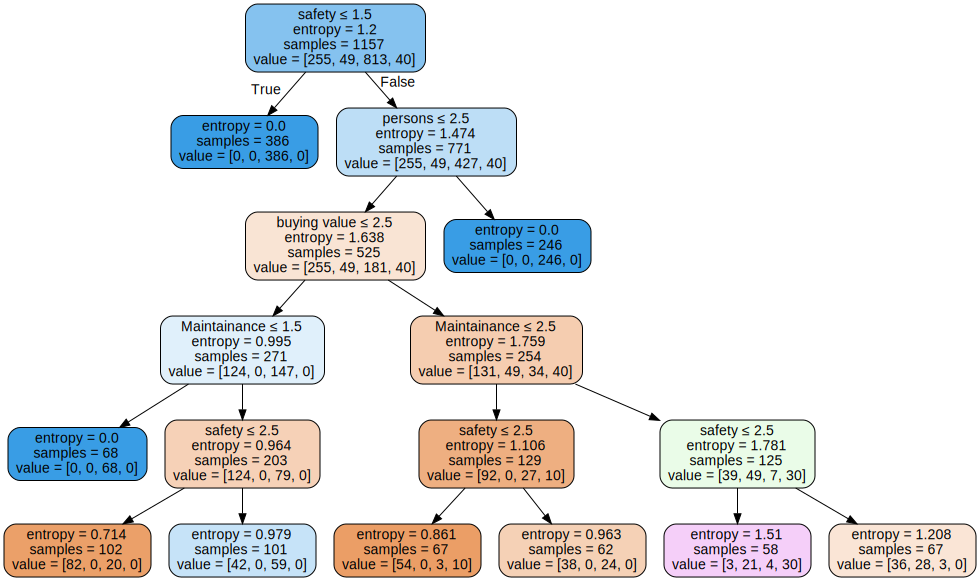

In [55]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              #class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("entropy.jpg")

graph 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# **Confusion** **Matrix**
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [56]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 99   0  23   7]
 [ 11   0   0   9]
 [ 21   0 376   0]
 [  3   0   0  22]]


## **Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.74      0.77      0.75       129
        good       0.00      0.00      0.00        20
       unacc       0.94      0.95      0.94       397
       vgood       0.58      0.88      0.70        25

    accuracy                           0.87       571
   macro avg       0.57      0.65      0.60       571
weighted avg       0.85      0.87      0.86       571



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Results and conclusion**

1. In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.87.
2. In the model with criterion gini index, the training-set accuracy score is 0.8686 while the test-set accuracy to be 0.8774. These two values are quite comparable. So, there is no sign of overfitting.
3. Similarly, in the model with criterion entropy, the training-set accuracy score is 0.8634 while the test-set accuracy to be 0.8704.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
4. In both the cases, the training-set and test-set accuracy score is the same.It may happen because of small dataset.
5. The confusion matrix and classification report yields very good model performance.

# **References**

1. The work done in this project is inspired from following books and websites:-

2. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

3. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

4. https://en.wikipedia.org/wiki/Decision_tree

5. https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

6. https://en.wikipedia.org/wiki/Entropy_(information_theory)

7. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

8. https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

9. https://acadgild.com/blog/decision-tree-python-code